# Common Imports

In [ ]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as sensitivity
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from statistics import mean
import gc
from scipy.linalg import eigh as eigen
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from collections import Counter
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Importing and Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lbcode=LabelEncoder()
scalar=StandardScaler()

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRML Major Project/healthcare-dataset-stroke-data.csv')

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data['gender']=lbcode.fit_transform(data['gender'])
data['ever_married']=lbcode.fit_transform(data['ever_married'])
data['work_type']=lbcode.fit_transform(data['work_type'])
data['Residence_type']=lbcode.fit_transform(data['Residence_type'])
data['smoking_status']=lbcode.fit_transform(data['smoking_status'])

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


[]

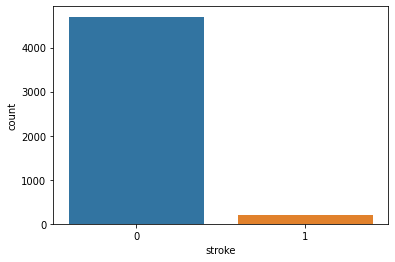

In [ ]:
sns.countplot(data['stroke'])
plt.plot()

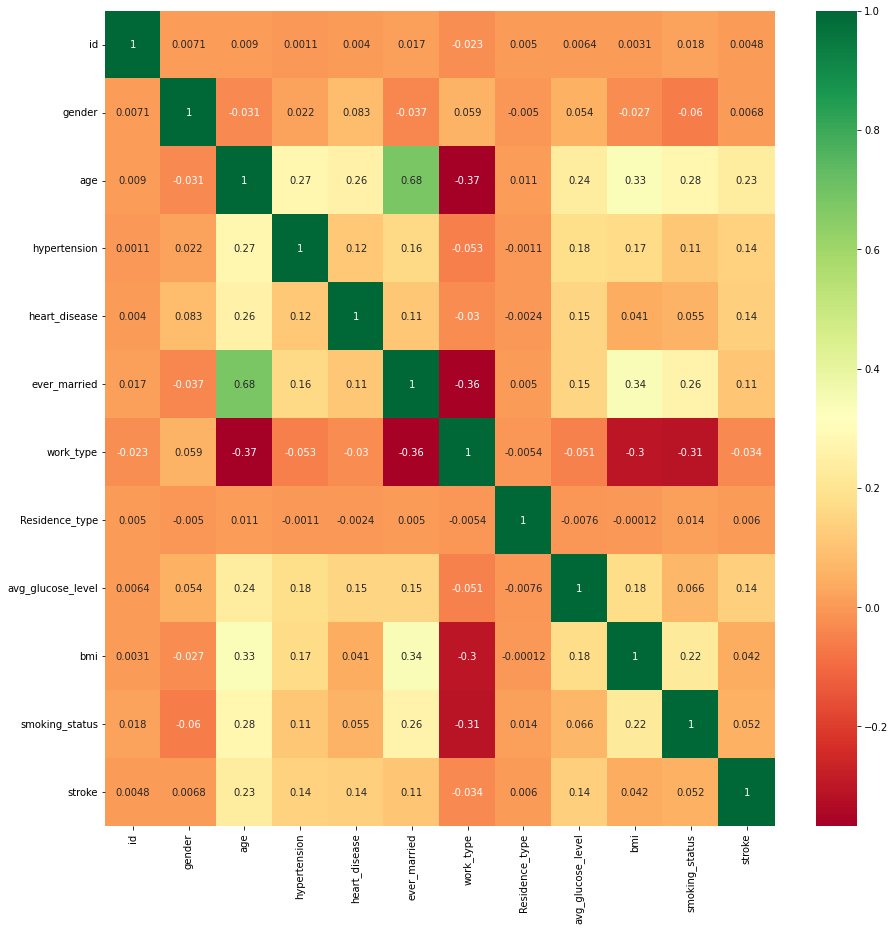

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

Dropping Residence_type and id as they do not provide any useful information

In [ ]:
y=data['stroke'].to_numpy()
X=data.drop(['stroke','Residence_type','id'],axis=1)

In [ ]:
scalar.fit(X)
data_scaled=pd.DataFrame(scalar.transform(X))
X_train,X_test,y_train,y_test=train_test_split(data_scaled,y,train_size=0.7,random_state=0)

In [ ]:
data_scaled

,0,1,2,3,4,5,6,7,8
0,1.198428,1.070138,-0.318067,4.381968,0.729484,-0.155697,2.777698,0.981345,-0.351788
1,1.198428,1.646563,-0.318067,4.381968,0.729484,-0.155697,0.013842,0.459269,0.585232
2,-0.833023,0.272012,-0.318067,-0.228208,0.729484,-0.155697,1.484132,0.701207,1.522252
3,-0.833023,1.602222,3.143994,-0.228208,0.729484,0.759651,1.549193,-0.623083,0.585232
4,1.198428,1.690903,-0.318067,-0.228208,0.729484,-0.155697,1.821368,0.013595,-0.351788
...,...,...,...,...,...,...,...,...,...
4904,-0.833023,-1.324241,-0.318067,-0.228208,-1.370831,1.674998,-0.050094,-1.310695,-1.288808
4905,-0.833023,1.690903,-0.318067,-0.228208,0.729484,0.759651,0.447882,1.414286,0.585232
4906,-0.833023,-0.348753,-0.318067,-0.228208,0.729484,0.759651,-0.502369,0.217332,0.585232
4907,1.198428,0.360692,-0.318067,-0.228208,0.729484,-0.155697,1.372920,-0.419346,-0.351788


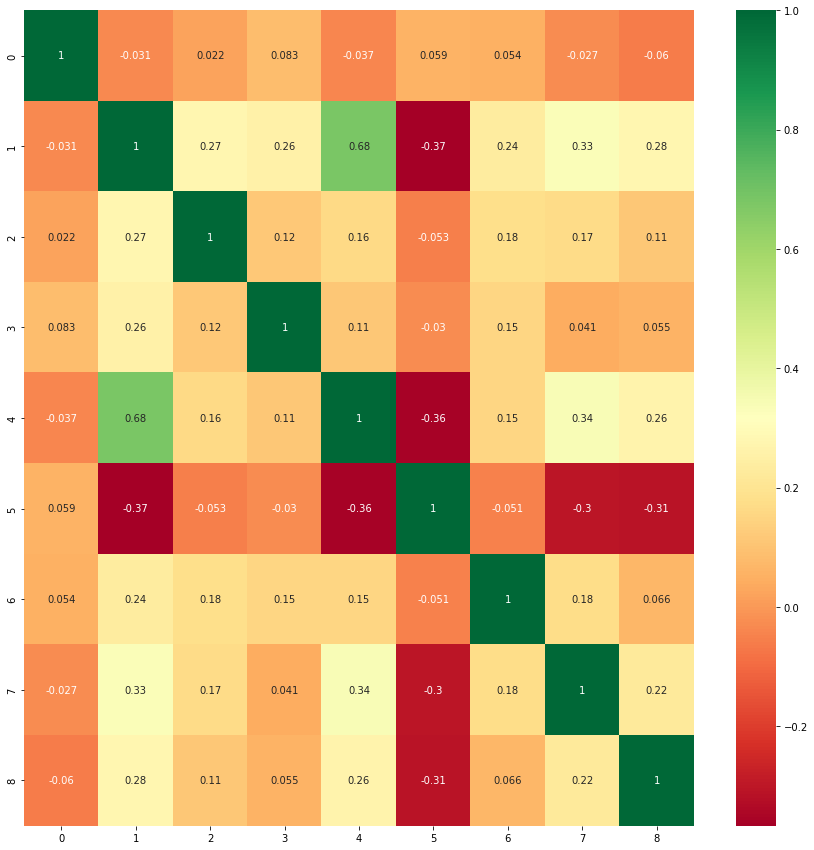

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data_scaled.corr(), annot = True, cmap = "RdYlGn")
plt.show()

# Training Models

In [ ]:
def plot_confusion_matrix_heatmap(y_actual,y_pred):
  cnf_mat = metrics.confusion_matrix(y_actual, y_pred)
  class_names=[0,1]
  fig, axis = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # Creating the heatmap of confusion mmatrix
  sns.heatmap(pd.DataFrame(cnf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

Random Forest Classifier

Number of strokes predicted: 4
Actual number of strokes: 55
Accuracy: 0.9626612355736592
f1 score: 0.06779661016949153
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.50      0.04      0.07        55

    accuracy                           0.96      1473
   macro avg       0.73      0.52      0.52      1473
weighted avg       0.95      0.96      0.95      1473



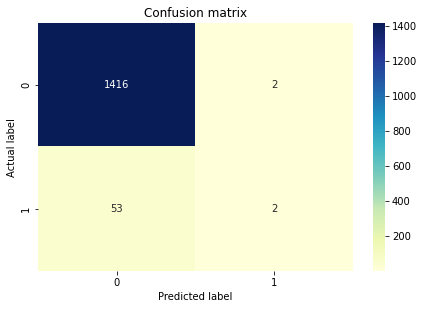

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(max_features=4,n_estimators=1000)
model=RFC.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

LightGBM

In [ ]:
!pip install lightgbm
import lightgbm as lgb

Number of strokes predicted: 22
Actual number of strokes: 55
Accuracy: 0.9531568228105907
f1 score: 0.1038961038961039
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1418
           1       0.18      0.07      0.10        55

    accuracy                           0.95      1473
   macro avg       0.57      0.53      0.54      1473
weighted avg       0.94      0.95      0.94      1473



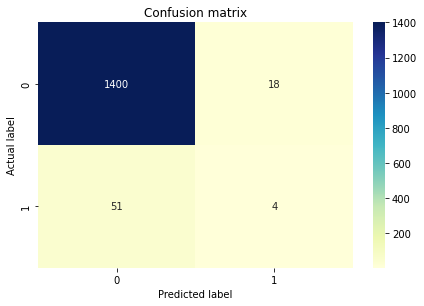

In [ ]:
lgb_classifier=lgb.LGBMClassifier(learning_rate=0.5)
model=lgb_classifier.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

LinearSVC

Number of strokes predicted: 0
Actual number of strokes: 55
Accuracy: 0.9626612355736592
f1 score: 0.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.00      0.00      0.00        55

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473



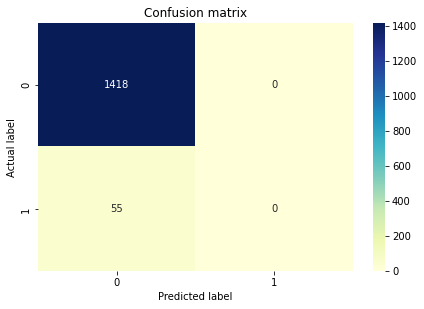

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.1)
model=svm.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

Logistic Regression

Number of strokes predicted: 1
Actual number of strokes: 55
Accuracy: 0.9633401221995926
f1 score: 0.03571428571428572
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       1.00      0.02      0.04        55

    accuracy                           0.96      1473
   macro avg       0.98      0.51      0.51      1473
weighted avg       0.96      0.96      0.95      1473



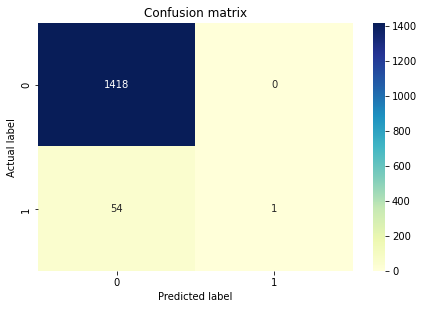

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(C=0.2,penalty='l2')
model=lgr.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

XGBoost

In [ ]:
!pip install xgboost
import xgboost as xgb

Number of strokes predicted: 35
Actual number of strokes: 55
Accuracy: 0.9470468431771895
f1 score: 0.13333333333333333
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1418
           1       0.17      0.11      0.13        55

    accuracy                           0.95      1473
   macro avg       0.57      0.54      0.55      1473
weighted avg       0.94      0.95      0.94      1473



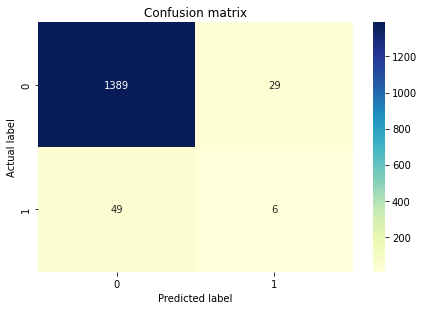

In [ ]:
xgb_classifier=xgb.XGBClassifier(learning_rate=1.2)
model=xgb_classifier.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

Decision Tree Classifier

Number of strokes predicted: 82
Actual number of strokes: 55
Accuracy: 0.9178547182620502
f1 score: 0.11678832116788321
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1418
           1       0.10      0.15      0.12        55

    accuracy                           0.92      1473
   macro avg       0.53      0.55      0.54      1473
weighted avg       0.93      0.92      0.93      1473



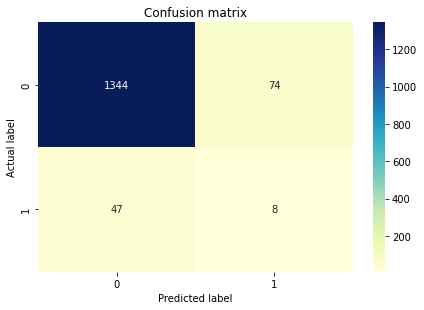

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(random_state = 0)
model=dtclassifier.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

In most models, recall of strokes is low and very few number of strokes are predicted. So we try to increase the number of strokes in the training data.

# Training models on oversampled+undersampled data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.2, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.2, random_state=42)
steps = [('o', over), ('u', under)]
over_under_pipeline = Pipeline(steps=steps)

In [ ]:
X_train_resample, y_train_resample=over_under_pipeline.fit_resample(X_train,y_train)

[]

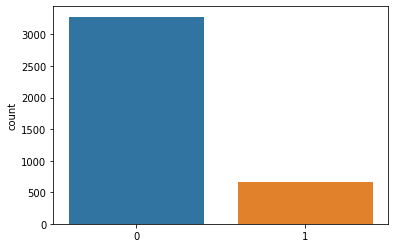

In [ ]:
sns.countplot(y_train_resample)
plt.plot()

Number of strokes predicted: 29
Actual number of strokes: 55
Accuracy: 0.9511201629327902
f1 score: 0.14285714285714285
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1418
           1       0.21      0.11      0.14        55

    accuracy                           0.95      1473
   macro avg       0.59      0.55      0.56      1473
weighted avg       0.94      0.95      0.94      1473



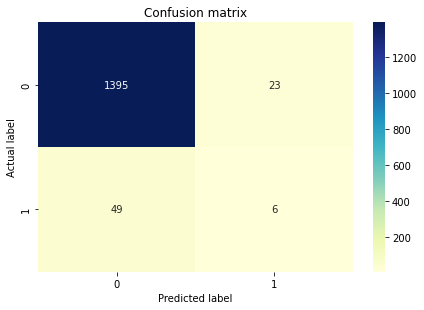

In [ ]:
RFC=RandomForestClassifier(max_features=4,n_estimators=1000)
model=RFC.fit(X_train_resample,y_train_resample)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

LightGBM

In [ ]:
!pip install lightgbm
import lightgbm as lgb

Number of strokes predicted: 40
Actual number of strokes: 55
Accuracy: 0.9490835030549898
f1 score: 0.2105263157894737
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1418
           1       0.25      0.18      0.21        55

    accuracy                           0.95      1473
   macro avg       0.61      0.58      0.59      1473
weighted avg       0.94      0.95      0.95      1473



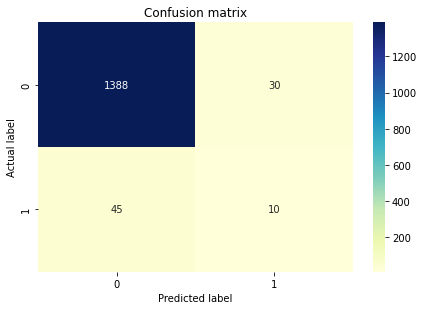

In [ ]:
lgb_classifier=lgb.LGBMClassifier(learning_rate=0.5)
model=lgb_classifier.fit(X_train_resample,y_train_resample)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

LinearSVC

Number of strokes predicted: 62
Actual number of strokes: 55
Accuracy: 0.9382213170400543
f1 score: 0.2222222222222222
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1418
           1       0.21      0.24      0.22        55

    accuracy                           0.94      1473
   macro avg       0.59      0.60      0.60      1473
weighted avg       0.94      0.94      0.94      1473



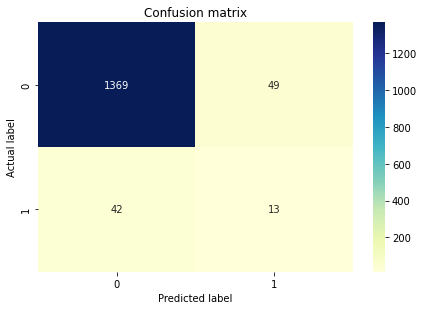

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.1)
model=svm.fit(X_train_resample,y_train_resample)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

Logistic Regression

Number of strokes predicted: 77
Actual number of strokes: 55
Accuracy: 0.93346911065852
f1 score: 0.25757575757575757
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1418
           1       0.22      0.31      0.26        55

    accuracy                           0.93      1473
   macro avg       0.60      0.63      0.61      1473
weighted avg       0.94      0.93      0.94      1473



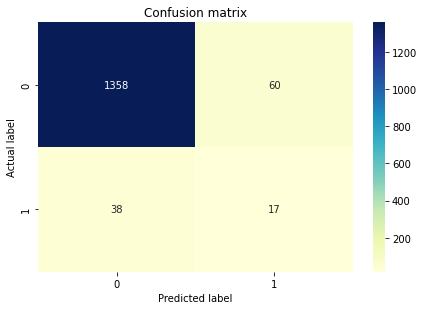

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(C=0.2,penalty='l2')
model=lgr.fit(X_train_resample,y_train_resample)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

XGBoost

In [ ]:
!pip install xgboost
import xgboost as xgb

Number of strokes predicted: 49
Actual number of strokes: 55
Accuracy: 0.9416157501697217
f1 score: 0.17307692307692307
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1418
           1       0.18      0.16      0.17        55

    accuracy                           0.94      1473
   macro avg       0.58      0.57      0.57      1473
weighted avg       0.94      0.94      0.94      1473



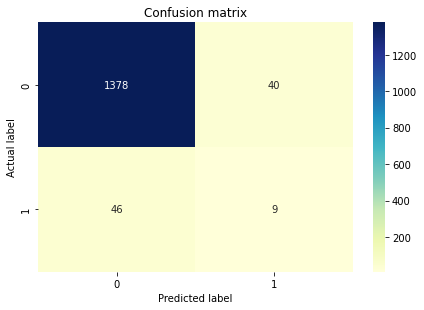

In [ ]:
xgb_classifier=xgb.XGBClassifier(learning_rate=1.2)
model=xgb_classifier.fit(X_train_resample,y_train_resample)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

Decision Tree Classifier

Number of strokes predicted: 106
Actual number of strokes: 55
Accuracy: 0.902919212491514
f1 score: 0.11180124223602485
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1418
           1       0.08      0.16      0.11        55

    accuracy                           0.90      1473
   macro avg       0.53      0.55      0.53      1473
weighted avg       0.93      0.90      0.92      1473



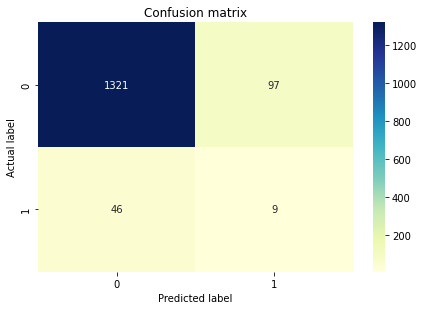

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(random_state = 0)
model=dtclassifier.fit(X_train_resample,y_train_resample)
y_pred=model.predict(X_test)
print('Number of strokes predicted:',sum(y_pred))
print('Actual number of strokes:',sum(y_test))
print('Accuracy:',accuracy(y_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_heatmap(y_test,y_pred)

We can see from the results that Logistic Regression on oversampled+undersampled data has performed the best as it gives highest number of correctly identified strokes (confusion matrix) and also the highest f1-score.

# Note

Oversampling the test data along with the train data shows better results. However, this must not be done as the test data is not meant to be modified using oversampling or undersampling. Doing this leads to better results on the modified test data but, the model will give bad results on any new data as this leads to loss in generalizability of the model.

In [ ]:
oversample=SMOTE(sampling_strategy=1, random_state=42)

In [ ]:
X_train_oversample, y_train_oversample=oversample.fit_resample(X_train,y_train)

In [ ]:
X_test_oversample, y_test_oversample=oversample.fit_resample(X_test,y_test)

Number of strokes predicted: 1523
Actual number of strokes: 1418
Accuracy: 0.7753878702397743
f1 score: 0.7834070044202651
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1418
           1       0.76      0.81      0.78      1418

    accuracy                           0.78      2836
   macro avg       0.78      0.78      0.78      2836
weighted avg       0.78      0.78      0.78      2836



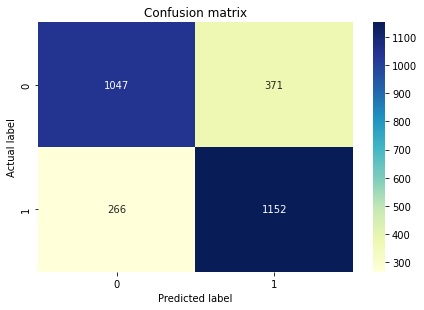

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(C=0.2,penalty='l2')
model=lgr.fit(X_train_oversample,y_train_oversample)
y_pred_oversample=model.predict(X_test_oversample)
print('Number of strokes predicted:',sum(y_pred_oversample))
print('Actual number of strokes:',sum(y_test_oversample))
print('Accuracy:',accuracy(y_test_oversample,y_pred_oversample))
print('f1 score:',f1_score(y_test_oversample,y_pred_oversample))
print(classification_report(y_test_oversample,y_pred_oversample))
plot_confusion_matrix_heatmap(y_test_oversample,y_pred_oversample)

# Creating the pipeline

Getting the un-preprocessed test data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRML Major Project/healthcare-dataset-stroke-data.csv')
data=data.dropna()

In [ ]:
_,X_test_pipe,_,y_test_pipe=train_test_split(data.drop(columns=['stroke']).to_numpy(),data['stroke'].to_numpy(),train_size=0.7,random_state=0)

In [ ]:
lbcode_gender=LabelEncoder()
lbcode_ever_married=LabelEncoder()
lbcode_work=LabelEncoder()
lbcode_residence=LabelEncoder()
lbcode_smoking=LabelEncoder()

lbcode_gender.fit(data['gender'])
lbcode_ever_married.fit(data['ever_married'])
lbcode_work.fit(data['work_type'])
lbcode_residence.fit(data['Residence_type'])
lbcode_smoking.fit(data['smoking_status'])

LabelEncoder()

Training the model on oversampled+undersampled training data. The trained model will be added to the pipeline

In [ ]:
lgr=LogisticRegression(C=0.2,penalty='l2')
model_final=lgr.fit(X_train_resample,y_train_resample)

Defining the function which deletes id and residence features from the test data. This function is added to the pipeline using FunctionTransformer from sklearn

In [ ]:
def preprocess(X_test_pipe):
  X_test_pipe[:,1]=lbcode_gender.transform(X_test_pipe[:,1])
  X_test_pipe[:,5]=lbcode_ever_married.transform(X_test_pipe[:,5])
  X_test_pipe[:,6]=lbcode_work.transform(X_test_pipe[:,6])
  X_test_pipe[:,7]=lbcode_residence.transform(X_test_pipe[:,7])
  X_test_pipe[:,10]=lbcode_smoking.transform(X_test_pipe[:,10])
  X_test_pipe=np.delete(X_test_pipe,0,1)
  X_test_pipe=np.delete(X_test_pipe,6,1)
  return(X_test_pipe)

Creating the pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(preprocess)
pipeline=make_pipeline(transformer,scalar,model_final)

Using the pipeline to predict on the test data

In [ ]:
y_pred_pipe=pipeline.predict(X_test_pipe)

Number of strokes predicted: 77
Actual number of strokes: 55
Accuracy: 0.93346911065852
f1 score: 0.25757575757575757
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1418
           1       0.22      0.31      0.26        55

    accuracy                           0.93      1473
   macro avg       0.60      0.63      0.61      1473
weighted avg       0.94      0.93      0.94      1473



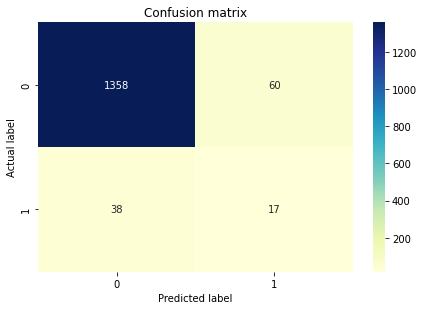

In [ ]:
print('Number of strokes predicted:',sum(y_pred_pipe))
print('Actual number of strokes:',sum(y_test_pipe))
print('Accuracy:',accuracy(y_test_pipe,y_pred_pipe))
print('f1 score:',f1_score(y_test_pipe,y_pred_pipe))
print(classification_report(y_test_pipe,y_pred_pipe))
plot_confusion_matrix_heatmap(y_test_pipe,y_pred_pipe)

The pipeline produces the same results as the Logistic Regression model trained on oversampled+undersampled data.